In [1]:
# --- Data Handling and Numerical Operations ---
import pandas as pd
import numpy as np
import os
from PIL import Image
import warnings

# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Deep Learning with TensorFlow and Keras ---
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

# --- Model Evaluation ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# --- Utility ---
# Ignore unnecessary warnings to keep the output clean
warnings.filterwarnings('ignore')

# --- Confirmation Message ---
print("✅ All essential libraries have been imported successfully!")

2025-09-17 18:47:39.359335: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758134859.530623      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758134859.579948      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✅ All essential libraries have been imported successfully!


In [2]:
from glob import glob

# --- Define file paths ---
# Base directory for the dataset
base_dir = '/kaggle/input/skin-cancer-mnist-ham10000'

# Path to the metadata CSV file
metadata_path = os.path.join(base_dir, 'HAM10000_metadata.csv')

# --- Load the metadata ---
skin_df = pd.read_csv(metadata_path)

# --- Create a dictionary to map image IDs to their FULL file paths ---
# Use glob to find all .jpg files in the subdirectories
all_image_paths = glob(os.path.join(base_dir, '*', '*.jpg'))

# Create a dictionary mapping the image ID (filename without extension) to its full path
image_paths = {os.path.splitext(os.path.basename(p))[0]: p for p in all_image_paths}

# --- Add a 'path' column to the DataFrame ---
# The new column will contain the correct, full path to the image file
skin_df['path'] = skin_df['image_id'].map(image_paths.get)

# --- Display the first 5 rows and a sample path to confirm ---
print("DataFrame with correct, full image paths added:")
print("\nSample path:", skin_df['path'][0])
skin_df.head()

DataFrame with correct, full image paths added:

Sample path: /kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1/ISIC_0027419.jpg


,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/kaggle/input/skin-cancer-mnist-ham10000/ham10...


In [3]:
# --- Check for missing values ---
print("Checking for missing values in each column:")
print(skin_df.isnull().sum())

# --- Handle missing values ---
# The 'age' column has some missing values. A common strategy is to fill them.
# We will fill the missing age values with the mean age of the dataset.
mean_age = skin_df['age'].mean()
skin_df['age'].fillna(mean_age, inplace=True)

# --- Confirm that missing values are handled ---
print("\nConfirming that missing values are handled:")
print(skin_df.isnull().sum())



# --- Add full lesion type names for better readability ---
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

skin_df['lesion_type'] = skin_df['dx'].map(lesion_type_dict.get)

# --- Display the first 5 rows with the new column ---
print("\nDataFrame with full lesion names:")
skin_df.head()

Checking for missing values in each column:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
path             0
dtype: int64

Confirming that missing values are handled:
lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
path            0
dtype: int64

DataFrame with full lesion names:


,lesion_id,image_id,dx,dx_type,age,sex,localization,path,lesion_type
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,Benign keratosis-like lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,Benign keratosis-like lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,Benign keratosis-like lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,Benign keratosis-like lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/kaggle/input/skin-cancer-mnist-ham10000/ham10...,Benign keratosis-like lesions


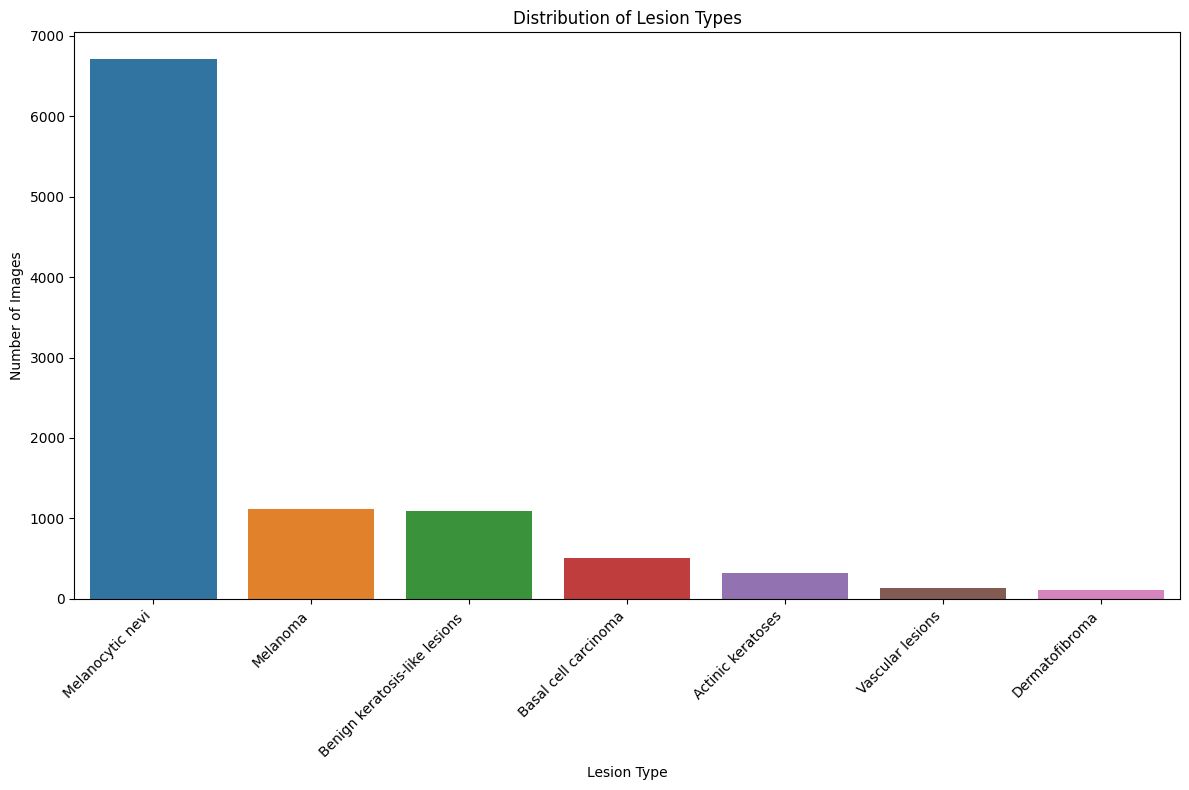

In [4]:
# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Create a count plot
sns.countplot(x='lesion_type', data=skin_df, order=skin_df['lesion_type'].value_counts().index)

# Add title and labels
plt.title('Distribution of Lesion Types')
plt.xlabel('Lesion Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
plt.tight_layout() # Adjust layout to make room for labels
plt.show()

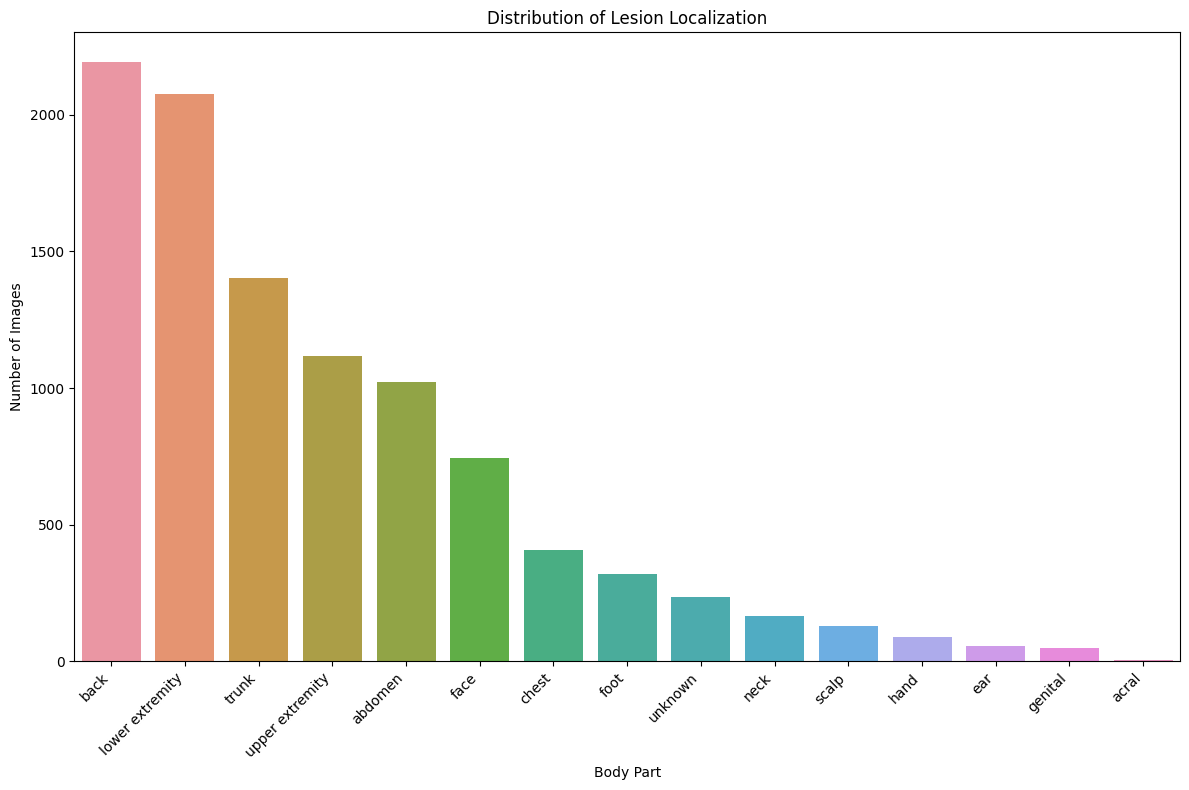

In [5]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a count plot for lesion localization
sns.countplot(x='localization', data=skin_df, order=skin_df['localization'].value_counts().index)

# Add title and labels
plt.title('Distribution of Lesion Localization')
plt.xlabel('Body Part')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

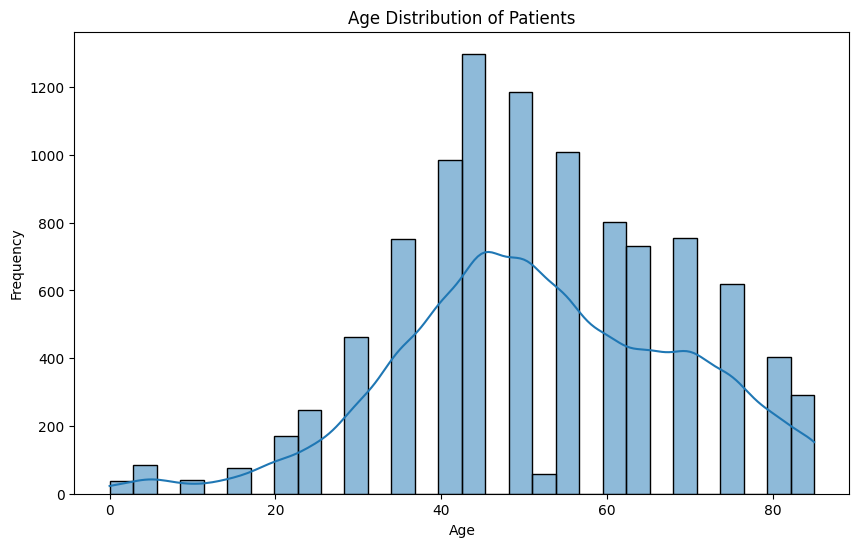

In [6]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram of the age distribution
sns.histplot(skin_df['age'], bins=30, kde=True)

# Add title and labels
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [10]:
# --- Define image size ---
# We will resize all images to 100x75 pixels
IMG_WIDTH = 100
IMG_HEIGHT = 75

# --- Load and resize images ---
# We create a new column 'image' that will store the resized image data as NumPy arrays.
# The .map() function applies our resizing logic to every file path in the 'path' column.
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((IMG_WIDTH, IMG_HEIGHT))))

# --- Confirmation ---
print("Images have been loaded and resized.")
print(f"The shape of the first image array is: {skin_df['image'][0].shape}")

Images have been loaded and resized.
The shape of the first image array is: (75, 100, 3)


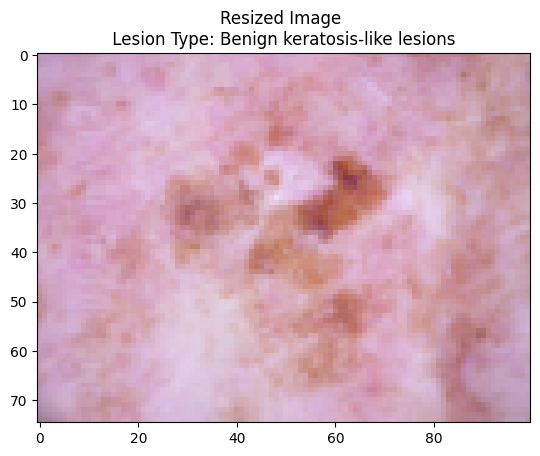

In [11]:
# Select a sample image to display
sample_image_index = 0

plt.imshow(skin_df['image'][sample_image_index])
plt.title(f"Resized Image \n Lesion Type: {skin_df['lesion_type'][sample_image_index]}")
plt.axis('on') # Hide the axes
plt.show()

In [12]:
# --- 1. Feature and Target Preparation ---
# X contains the image data (features)
# y contains the lesion type labels (target)
X = np.asarray(skin_df['image'].tolist())
y = skin_df['lesion_type']

# --- 2. Label Encoding ---
# Convert the categorical text labels into numerical format (0, 1, 2, etc.)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# --- 3. Train-Test Split ---
# Split the data into a training set (75%) and a testing set (25%)
# random_state ensures that the split is the same every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# --- 4. Normalization ---
# Scale pixel values from the range [0, 255] to [0, 1]
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# --- Confirmation ---
print("Data preparation complete.")
print(f"Shape of X_train: {X_train_normalized.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test_normalized.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data preparation complete.
Shape of X_train: (7511, 75, 100, 3)
Shape of y_train: (7511,)
Shape of X_test: (2504, 75, 100, 3)
Shape of y_test: (2504,)


In [13]:
# --- Define the CNN Model Architecture ---
num_classes = 7
model = Sequential()

# Block 1: Feature Extraction
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 2: Deeper Feature Extraction
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3: Even Deeper Feature Extraction
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# --- Classifier Head ---
# Flatten the feature maps to a 1D vector
model.add(Flatten())

# Fully connected layer for classification
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# --- Compile the Model ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --- Print the Model Summary ---
print("Model architecture has been defined and compiled.")
model.summary()

I0000 00:00:1758135095.635006      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model architecture has been defined and compiled.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 73, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 36, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 34, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 17, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 10, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 10, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8960)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,147,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,241,159 (4.73 MB)

 Trainable params: 1,241,159 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# --- 1. Set Up Learning Rate Annealing ---
# This callback reduces the learning rate when validation accuracy stops improving.
# This helps the model to fine-tune its weights and find a better solution.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# --- 2. Define Training Parameters ---
epochs = 30
batch_size = 64

# --- 3. Fit the Model ---
# This is where the actual training happens.
# The 'history' object will store the performance metrics from each epoch.
history = model.fit(X_train_normalized,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test_normalized, y_test),
                    callbacks=[learning_rate_reduction])

Epoch 1/30


I0000 00:00:1758135217.439318     103 service.cc:148] XLA service 0x7cfb1800cb40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758135217.440024     103 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758135217.747649     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


 16/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5302 - loss: 1.4454

I0000 00:00:1758135221.966664     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.6391 - loss: 1.1715 - val_accuracy: 0.6661 - val_loss: 1.0195 - learning_rate: 0.0010
Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6730 - loss: 0.9678 - val_accuracy: 0.6621 - val_loss: 0.9658 - learning_rate: 0.0010
Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6713 - loss: 0.9112 - val_accuracy: 0.6673 - val_loss: 0.9932 - learning_rate: 0.0010
Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6683 - loss: 0.8940 - val_accuracy: 0.6865 - val_loss: 0.8973 - learning_rate: 0.0010
Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6801 - loss: 0.8662 - val_accuracy: 0.6837 - val_loss: 0.8650 - learning_rate: 0.0010
Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6853 - loss: 0.8531 - val_accuracy: 0.6965 - val_loss: 0.8415 - learning_rate: 0.0010
Epoch 7/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6909 - loss: 0.8262 - val

Test Accuracy: 75.68%
Test Loss: 0.6587


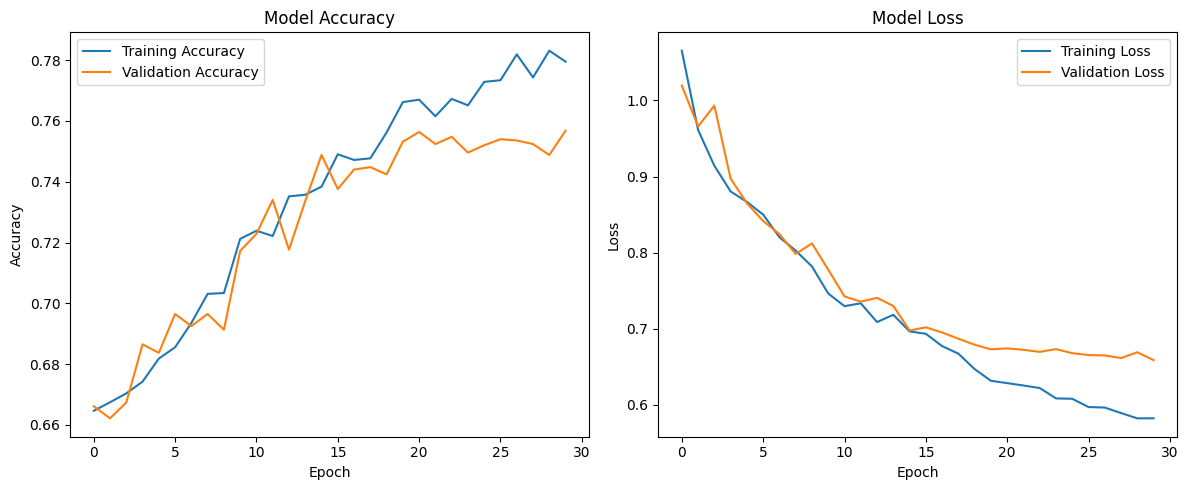

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


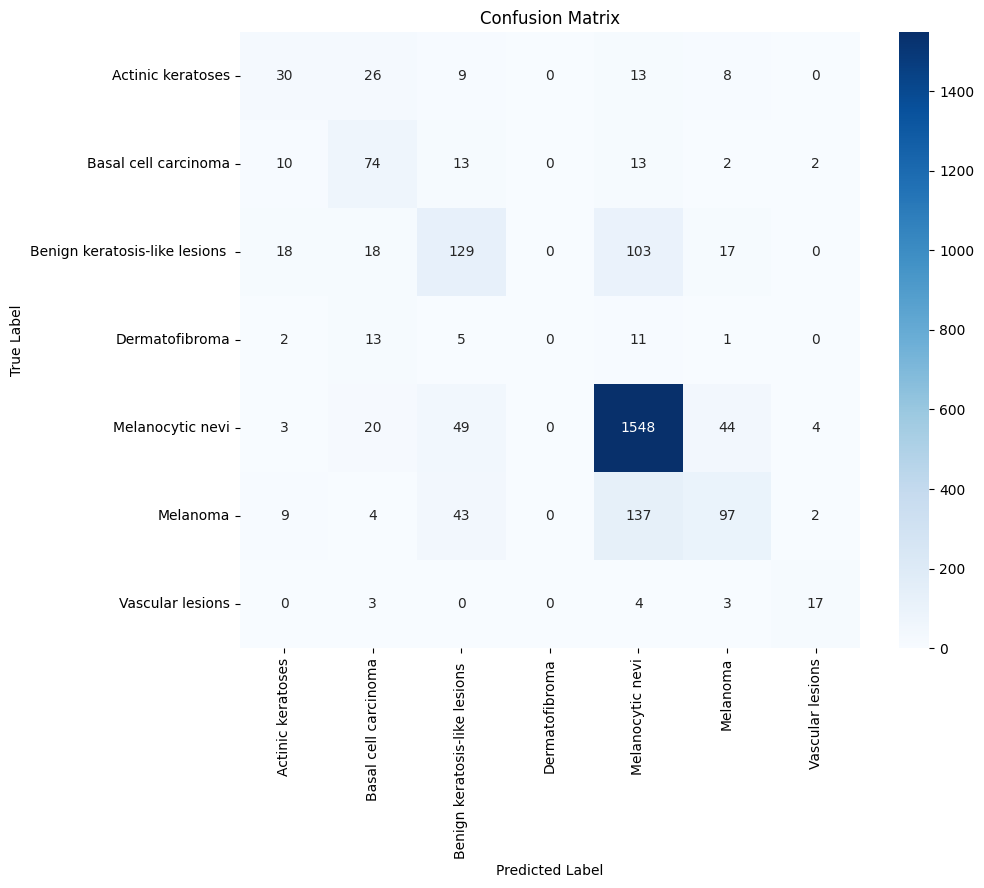


Classification Report:

                                precision    recall  f1-score   support

             Actinic keratoses       0.42      0.35      0.38        86
          Basal cell carcinoma       0.47      0.65      0.54       114
Benign keratosis-like lesions        0.52      0.45      0.48       285
                Dermatofibroma       0.00      0.00      0.00        32
              Melanocytic nevi       0.85      0.93      0.89      1668
                      Melanoma       0.56      0.33      0.42       292
              Vascular lesions       0.68      0.63      0.65        27

                      accuracy                           0.76      2504
                     macro avg       0.50      0.48      0.48      2504
                  weighted avg       0.73      0.76      0.74      2504



In [15]:
# --- 1. Evaluate the model on the test set ---
loss, accuracy = model.evaluate(X_test_normalized, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# --- 2. Plotting Training History ---
# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# --- 3. Confusion Matrix ---
# Get model predictions on the test set
y_pred_probs = model.predict(X_test_normalized)
y_pred = np.argmax(y_pred_probs, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- 4. Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


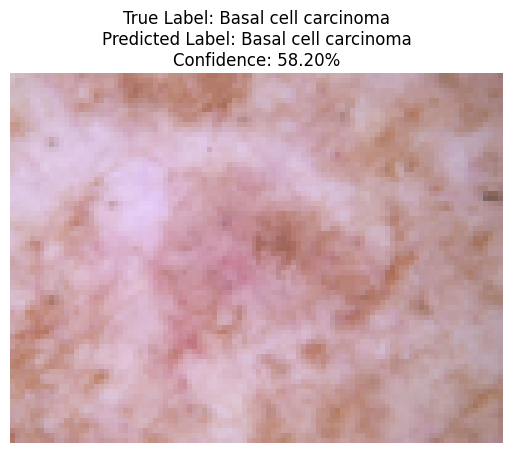

In [16]:
# --- Select an image from the test set to predict ---
# You can change this index to test different images
image_to_test_index = 50

# Get the single image and its true label
img_to_test = X_test_normalized[image_to_test_index]
true_label_index = y_test[image_to_test_index]
true_label_name = encoder.inverse_transform([true_label_index])[0]

# --- Prepare the image for the model ---
# The model expects a "batch" of images, so we add a new dimension
img_for_prediction = np.expand_dims(img_to_test, axis=0)

# --- Make a prediction ---
pred_probs = model.predict(img_for_prediction)
pred_label_index = np.argmax(pred_probs, axis=1)[0]
predicted_label_name = encoder.inverse_transform([pred_label_index])[0]
prediction_confidence = np.max(pred_probs) * 100

# --- Display the results ---
plt.imshow(img_to_test)
plt.title(f"True Label: {true_label_name}\nPredicted Label: {predicted_label_name}\nConfidence: {prediction_confidence:.2f}%")
plt.axis('off')
plt.show()